<a href="https://colab.research.google.com/github/IS737StockPicker/stonks/blob/main/modeling_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

In [65]:
import pandas as pd
from datetime import datetime
from datetime import date
stock_data= pd.read_csv('/content/stonks/Stocks_march_sept.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])

stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors='coerce',utc=True)
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')
stock_data.head()
#stock_data.info()
#stock_data['Date'].day()
#stock_data.dtypes
#stock_data['Date'].astype()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    276 non-null    object 
 1   XLE     276 non-null    int64  
 2   XLF     276 non-null    int64  
 3   XLU     276 non-null    int64  
 4   XLI     276 non-null    int64  
 5   XLK     276 non-null    int64  
 6   XLV     276 non-null    int64  
 7   XLY     276 non-null    int64  
 8   IYR     276 non-null    int64  
 9   AAPL    276 non-null    int64  
 10  XLB     276 non-null    int64  
 11  XLP     276 non-null    int64  
 12  SPY     276 non-null    int64  
 13  ^DJI    276 non-null    int64  
 14  NDX     275 non-null    float64
dtypes: float64(1), int64(13), object(1)
memory usage: 32.5+ KB


In [37]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()
Guardian_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Headline Mean    185 non-null    float64
 2   Body Mean        185 non-null    float64
 3   Headline Median  185 non-null    float64
 4   Body Median      185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()

,Date,Headline Mean,Body Mean,Headline Median,Body Median
0,2022-03-13,-0.24,0.05,-0.21,0.19
1,2022-03-14,-0.12,-0.06,0.00,0.00
2,2022-03-15,-0.44,-0.39,-0.46,-0.47
3,2022-03-16,0.10,-0.09,0.00,-0.13
4,2022-03-17,-0.20,-0.14,-0.03,-0.03


In [87]:
#STILL NEEDS TO BE UPDATED
NYT_Data = pd.read_csv('/content/stonks/ny_times_grouped_data.csv')


Merge Stock Data and Gaurdian Data

One Issue is that most of the time stocks are up

In [119]:
daily_stock_Guardian = stock_data.merge(Guardian_Data , how = 'inner', left_on='Date',right_on='Date')

daily_stock_Guardian.columns = daily_stock_Guardian.columns.str.replace(' ', '_')
#daily_stock_Guardian =daily_stock_Guardian.where(daily_stock_Guardian['Date']> '2022-08-01')

daily_stock_Guardian['XLE'].sum()
daily_stock_Guardian['XLI'].sum()
daily_stock_Guardian.info()
sum_column = daily_stock_Guardian.sum(axis=0)
print (sum_column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             127 non-null    object 
 1   XLE              127 non-null    int64  
 2   XLF              127 non-null    int64  
 3   XLU              127 non-null    int64  
 4   XLI              127 non-null    int64  
 5   XLK              127 non-null    int64  
 6   XLV              127 non-null    int64  
 7   XLY              127 non-null    int64  
 8   IYR              127 non-null    int64  
 9   AAPL             127 non-null    int64  
 10  XLB              127 non-null    int64  
 11  XLP              127 non-null    int64  
 12  SPY              127 non-null    int64  
 13  ^DJI             127 non-null    int64  
 14  NDX              127 non-null    float64
 15  Headline_Mean    127 non-null    float64
 16  Body_Mean        127 non-null    float64
 17  Headline_Median 

In [73]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split 

Checking to see how it plotted

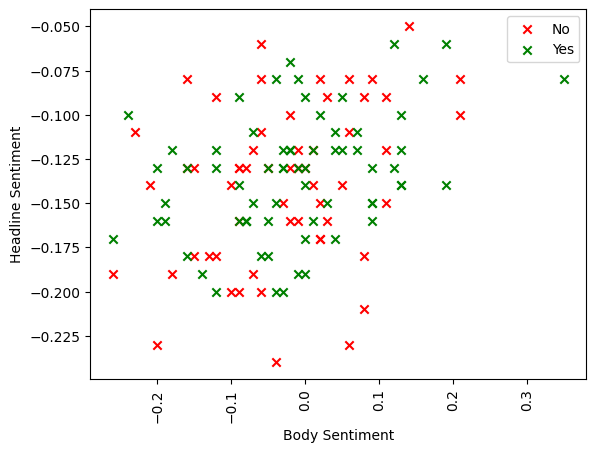

In [168]:
# create a scatter plot of Experience vs. Training and keep track
# of the outcome (1 or 0) using colors
fig, ax = plt.subplots()

subset0 = daily_stock_Guardian.loc[daily_stock_Guardian['XLE']== 0]
ax.scatter(subset0.Body_Mean, subset0.Headline_Mean, marker='x', label='No', color='red')

subset1 = daily_stock_Guardian.loc[daily_stock_Guardian['XLE']== 1]
ax.scatter(subset1.Body_Mean, subset1.Headline_Mean, marker='x', label='Yes', color='green')

plt.ylabel('Headline Sentiment')  # set x-axis label
plt.xlabel('Body Sentiment')  # set y-axis label
plt.xticks(rotation=90)  

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

In [169]:
# Define categorical variable (not stricly needed by good practice)
daily_stock_Guardian['XLE'] = daily_stock_Guardian['XLE'].astype('category')

# Define X and y
y = daily_stock_Guardian['XLE']
X = daily_stock_Guardian.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
print(X)
print(y)

     Headline_Mean  Body_Mean  Headline_Median  Body_Median
0            -0.13      -0.01             0.00        -0.00
1            -0.20      -0.12            -0.15        -0.54
2            -0.08      -0.16             0.00        -0.55
3            -0.10      -0.24             0.00        -0.85
4            -0.09      -0.09             0.00        -0.31
..             ...        ...              ...          ...
122          -0.14       0.13             0.00         0.83
123          -0.10       0.21             0.00         0.89
124          -0.08       0.35             0.00         0.95
125          -0.16       0.01             0.00         0.10
126          -0.11       0.06             0.00         0.54

[127 rows x 4 columns]
0      0
1      1
2      0
3      1
4      1
      ..
122    1
123    0
124    1
125    1
126    0
Name: XLE, Length: 127, dtype: category
Categories (2, int64): [0, 1]


In [170]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)

In [171]:
# Logistic Regression
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [172]:
# Run class y predictions
y_pred = lr.predict(X_test)

In [173]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 6, 17],
       [11, 17]])

In [174]:
accuracy_score(y_test, y_pred)

0.45098039215686275

In [154]:
# What if we want to change the default probability cutoff of 0.5?

# Extract regressed probabilities using predict_proba
p_pred=lr.predict_proba(X_test)[:,1]
np.round(p_pred,3)

array([0.569, 0.501, 0.482, 0.541, 0.566, 0.464, 0.591, 0.453, 0.619,
       0.551, 0.426, 0.569, 0.508, 0.633, 0.511, 0.59 , 0.469, 0.539,
       0.659, 0.524, 0.605, 0.455, 0.523, 0.539, 0.581, 0.514, 0.522,
       0.506, 0.484, 0.473, 0.455, 0.652, 0.498, 0.593, 0.512, 0.478,
       0.485, 0.459, 0.484, 0.571, 0.583, 0.482, 0.655, 0.612, 0.585,
       0.566, 0.564, 0.439, 0.697, 0.521, 0.451])

In [155]:
cutoff = 0.25
y_pred_new=[1 if i > cutoff else 0 for i in p_pred]
y_pred_new

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [156]:
# confusion matrix with different cutoff
confusion_matrix(y_test,y_pred_new)

array([[ 0, 23],
       [ 0, 28]])

In [157]:
# accuracy score with different cutoff
accuracy_score(y_test, y_pred_new)

0.5490196078431373